<a href="https://colab.research.google.com/github/Maria-mbugua/IPWeek9-Core/blob/main/kNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) DEFINING THE QUESTION**

## **a) Specifying the Question**

Using the train set dataset that has been provided to train and test the data.

## **b) Defining the metrics of success**

Performing kNN Classification with the train dataset.

## **c) Understanding the context**

Using the kNN Classifier in the train dataset.

## **d) Recording the Experimental Design**

1. Define the question, the metric for success, the context, experimental design.

2. Read and clean the dataset.

3. Define the appropriate method to answer the question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.

5. Perform univariate, bivariate and multivariate analysis.

6. Partitioning the dataset into 80 - 20 sets.

7. Using the kNN Classifier.

8. Repeat step 6 to step 7 twice, each time splitting the dataset differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

9. Applying an optimization technique.

10. Recommendation for kNN Classifier.

## **e) Relevance of the data**

The data used in this project is for performing kNN Classification.

# **2) DATA ANALYSIS**

## **a) Checking the Data**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Reading the data
train = pd.read_csv('train .csv')

In [3]:
# Previewing the top of the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Previewing the tail of the dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Previewing the columns of the dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Previewing the shape of the dataset
train.shape

(891, 12)

In [7]:
# Displaying the number of unique values of the columns in the dataset
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
# Displaying the datatypes
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **b) Data Cleaning**

In [12]:
# Checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Replacing null values with zero
train1 = train.fillna(0)
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
# Checking for null values
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
# Checking for duplicates
train1.duplicated().any()

False

In [16]:
# Count of duplicates
train1.duplicated().sum()

0

In [17]:
# Shape of the dataset
train1.shape

(891, 12)

In [18]:
# Changing from float to integers
train1['Age'] = train1['Age'].astype(int)
train1['Fare'] = train1['Fare'].astype(int)

In [19]:
# Previewing the numerical values
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.783389,0.523008,0.381594,31.785634
std,257.353842,0.486592,0.836071,17.597344,1.102743,0.806057,49.703730
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.000000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


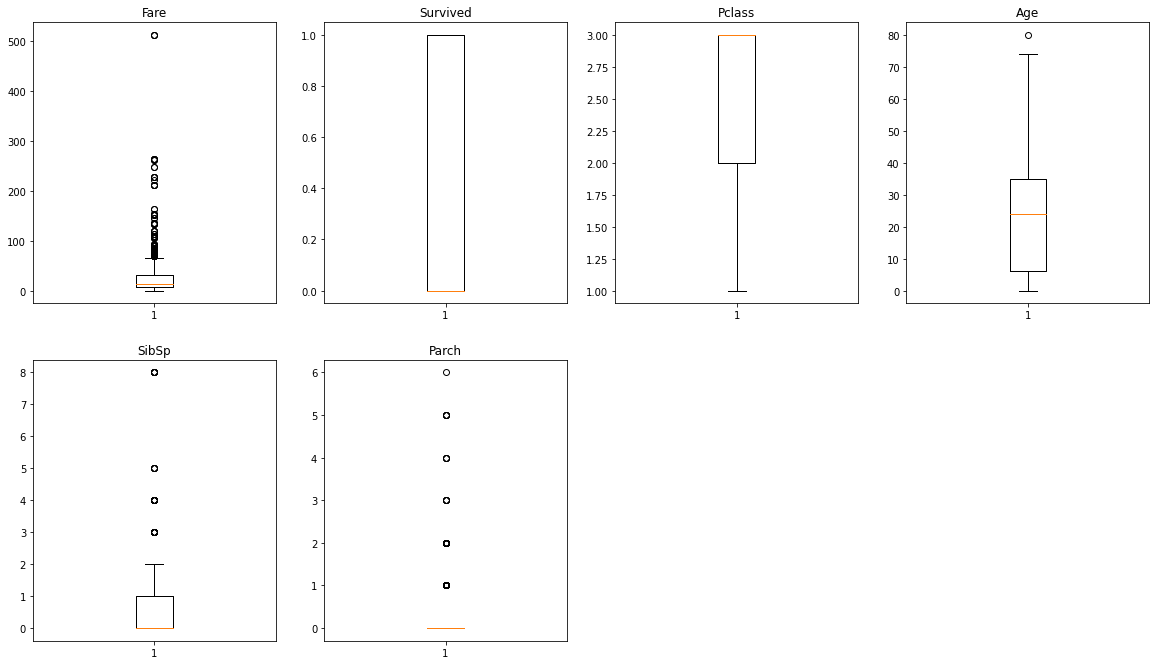

In [20]:
# Outliers
columns = {'Fare': 1, 'Survived': 2, 'Pclass': 3, 'Age': 4, 'SibSp': 5, 'Parch': 6}

plt.figure(figsize=(20,30))

# boxplot for each column
for variable,i in columns.items():
  plt.subplot(5,4,i)
  plt.boxplot(train1[variable])
  plt.title(variable)

plt.show()


In [21]:
# Anomalies
q11 = train1['Age'].quantile(.25)
q31 = train1['Age'].quantile(.75)

iqr11 = q31 - q11
iqr11

q11, q31 = np.percentile(train1['Age'], [25, 75]) 

iqr = q31 - q11

l_bound = q11 - (1.5*iqr)
u_bound = q31 + (1.5 * iqr)

print(iqr11, iqr)

29.0 29.0


In [22]:
# Removing outliers
Q1 = train1.quantile(0.25)
Q3 = train1.quantile(0.75)
IQR = Q3 - Q1
 
train2 = train1[~((train1 < (Q1 - 1.5 * IQR)) | (train1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# New dataset
print(train2.shape)

# Old dataset
print(train1.shape)

(608, 12)
(891, 12)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


# **3) EXPLORATORY DATA ANALYSIS**

## **a) Univariate Analysis**

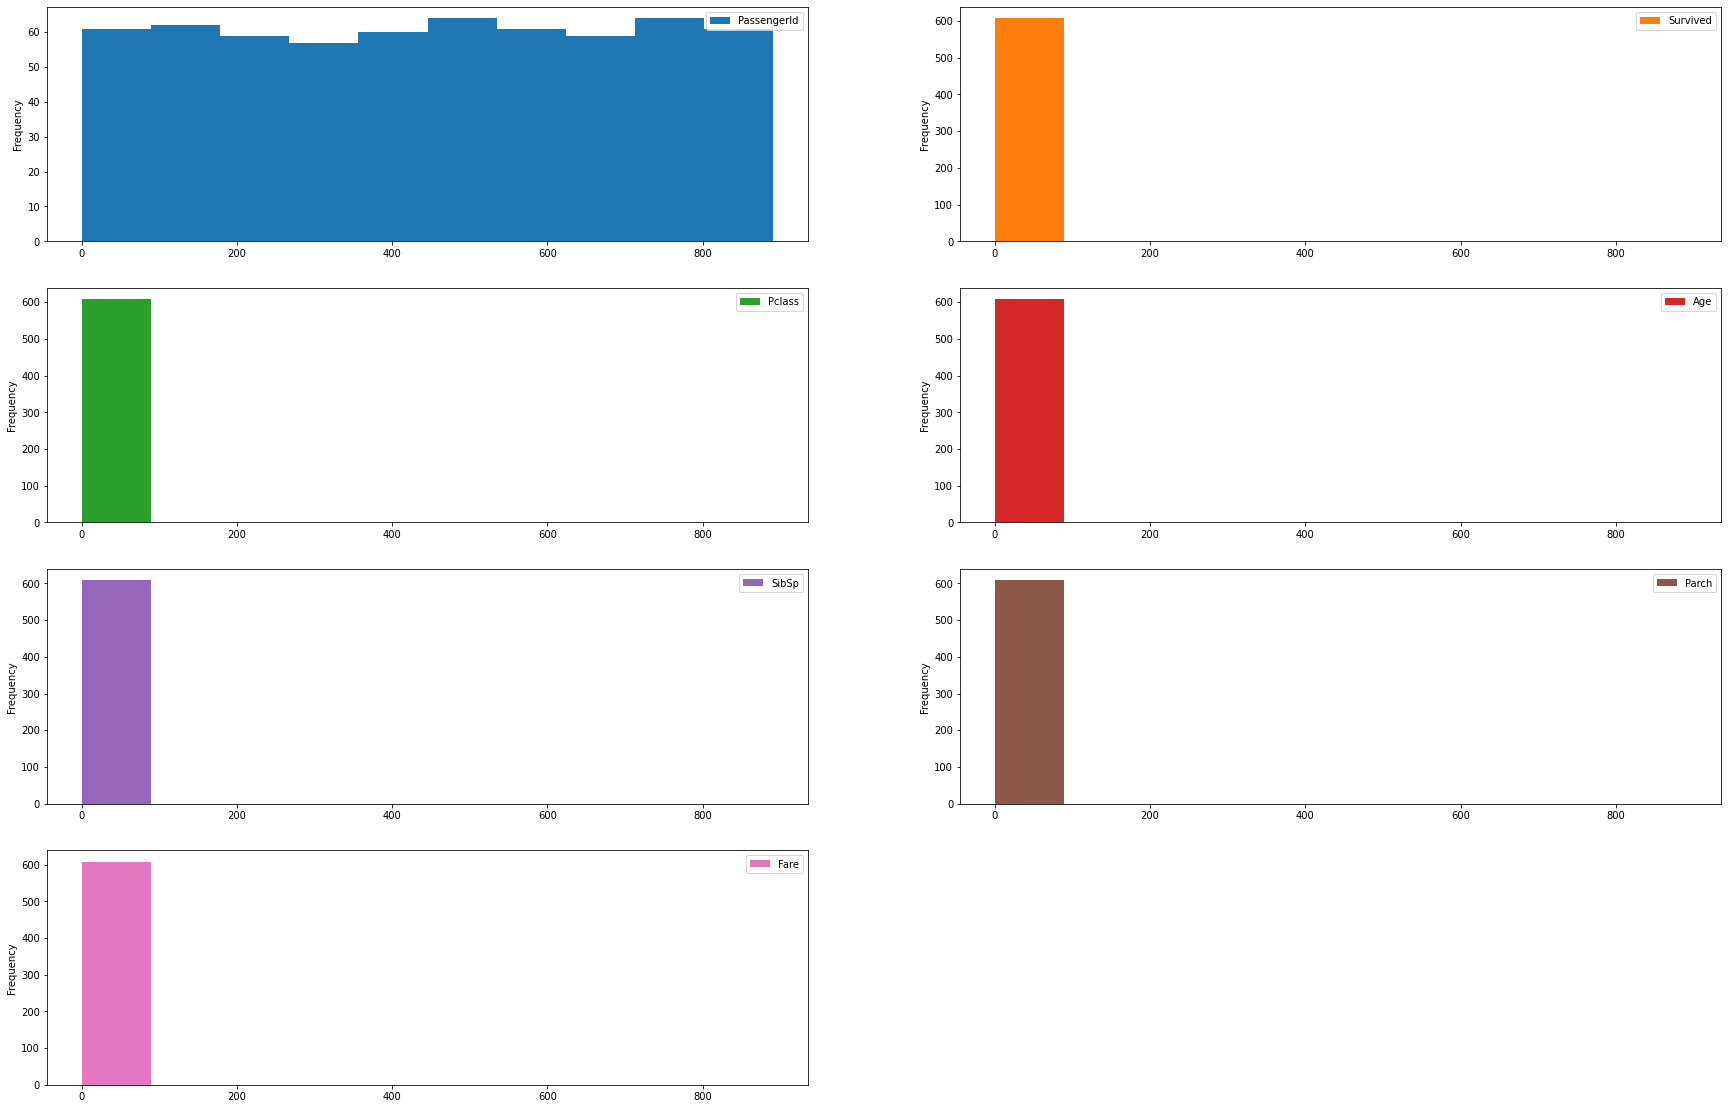

In [23]:
# Histogram
plt.rcParams['figure.figsize']=(30,25)
train2.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

In [25]:
# Removing warnings
import warnings
warnings.filterwarnings('ignore')

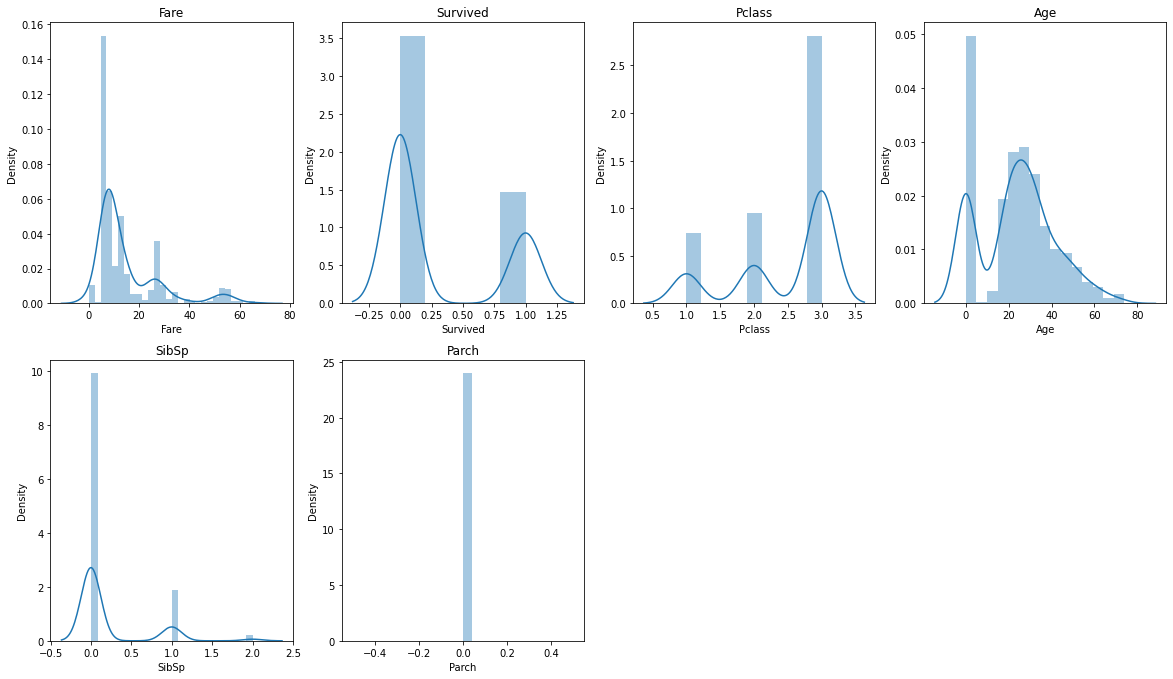

In [26]:
# Histogram from the dictionary 
plt.figure(figsize = (20,30))
for variable,i in columns.items():
  
  plt.subplot(5,4,i)
  sns.distplot(train2[variable])
  plt.title(variable)

plt.show()

## **b) Bivariate Analysis**

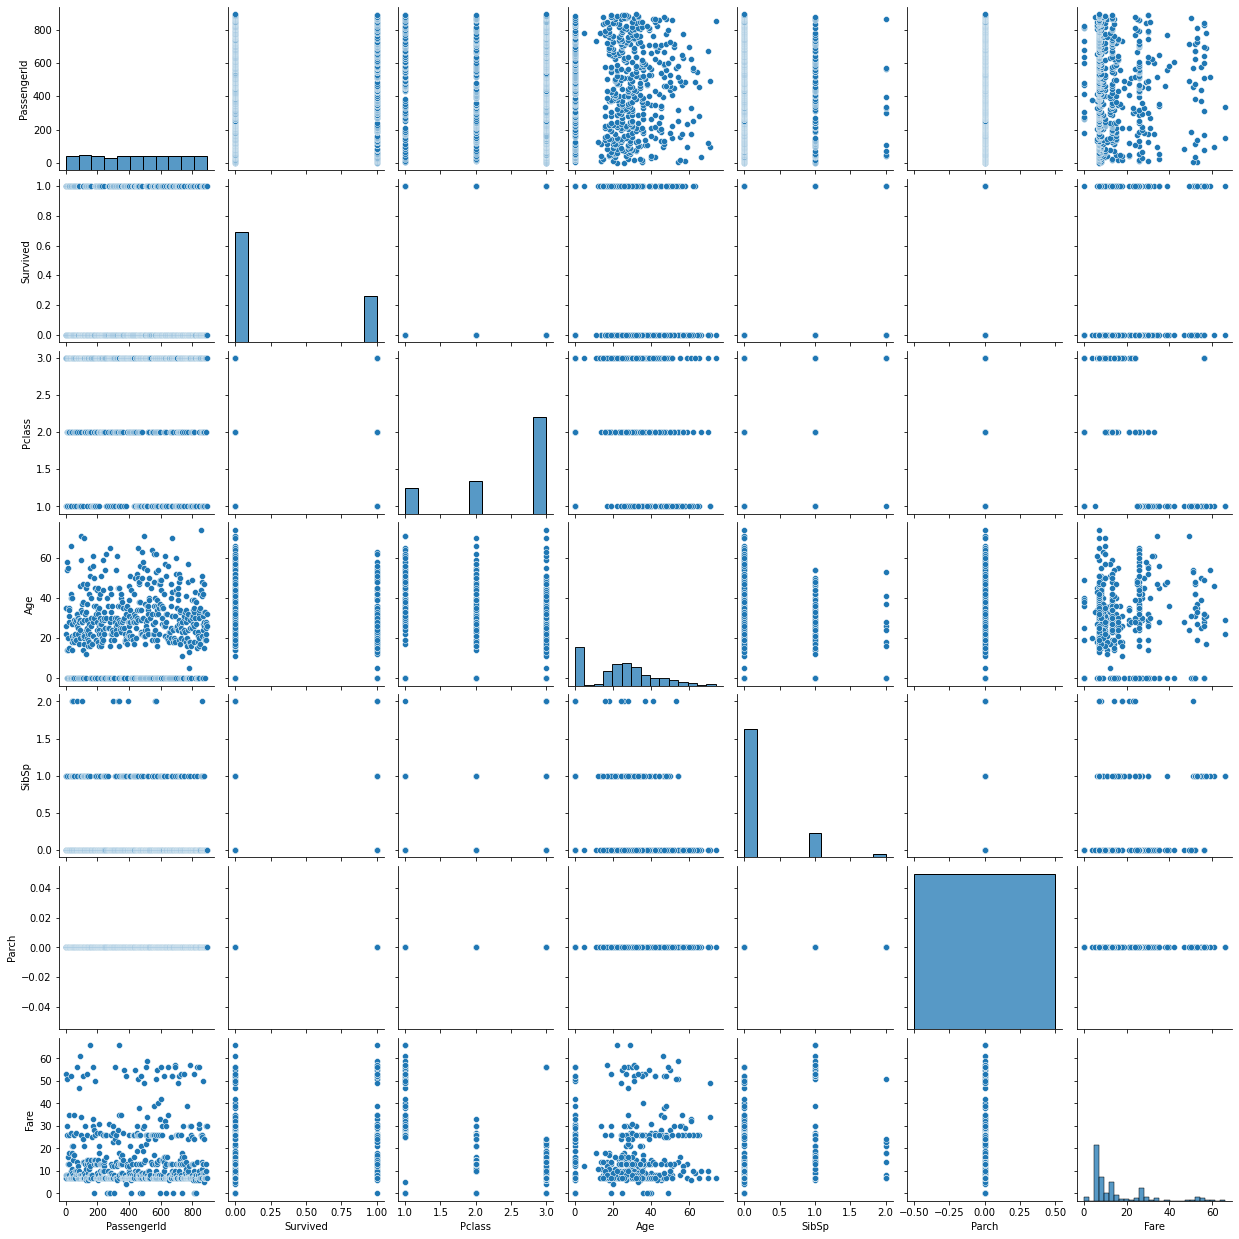

In [27]:
# Scatterplot
sns.pairplot(train2)
plt.show()

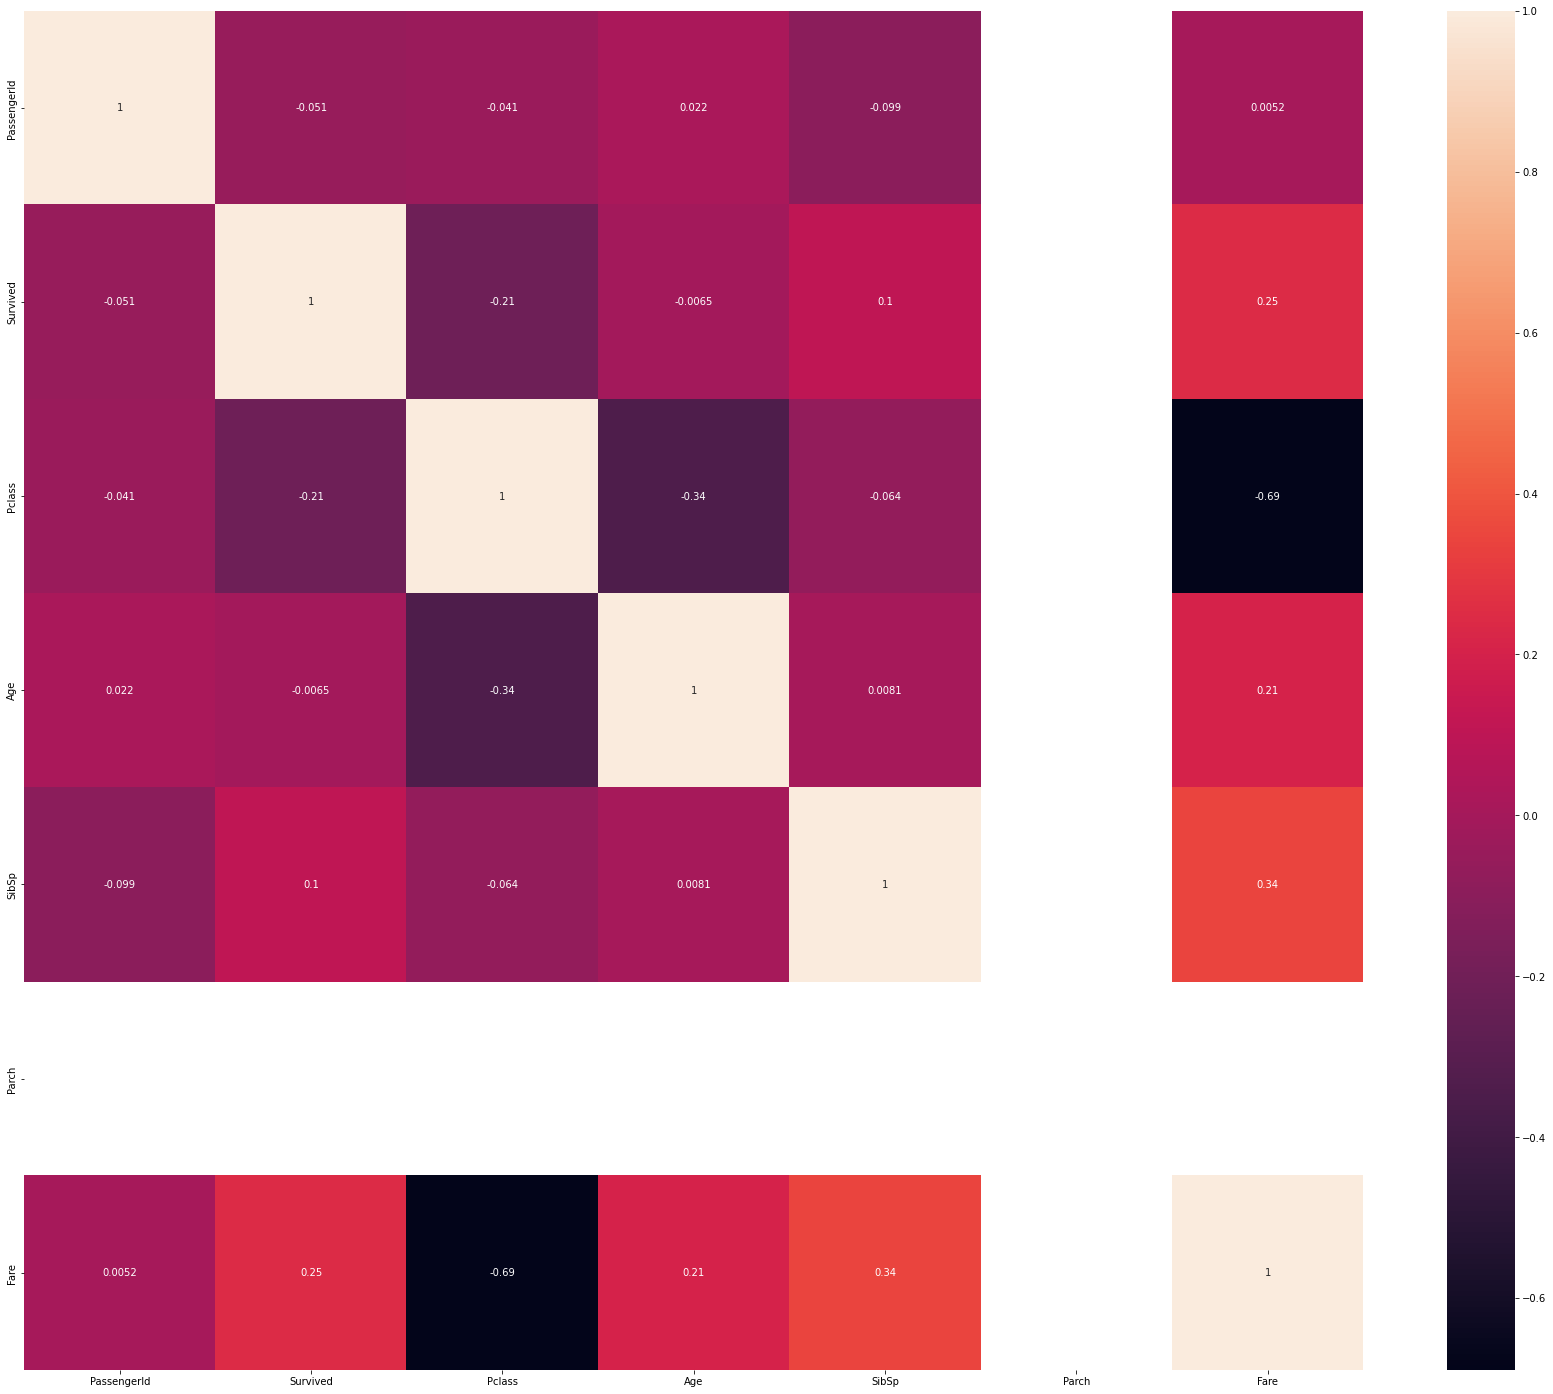

In [28]:
# Heatmap
sns.heatmap(train2.corr(),annot=True)
plt.show()

In [29]:
# Correlation coefficients
corr = train2.corr()
corr
# Fare and Pclass are negatively correlated

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.051307,-0.040853,0.021690,-0.098963,NaN,0.005186
Survived,-0.051307,1.000000,-0.211022,-0.006482,0.103503,NaN,0.247591
Pclass,-0.040853,-0.211022,1.000000,-0.340952,-0.063701,NaN,-0.689168
Age,0.021690,-0.006482,-0.340952,1.000000,0.008089,NaN,0.205884
SibSp,-0.098963,0.103503,-0.063701,0.008089,1.000000,NaN,0.340870
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.005186,0.247591,-0.689168,0.205884,0.340870,NaN,1.000000


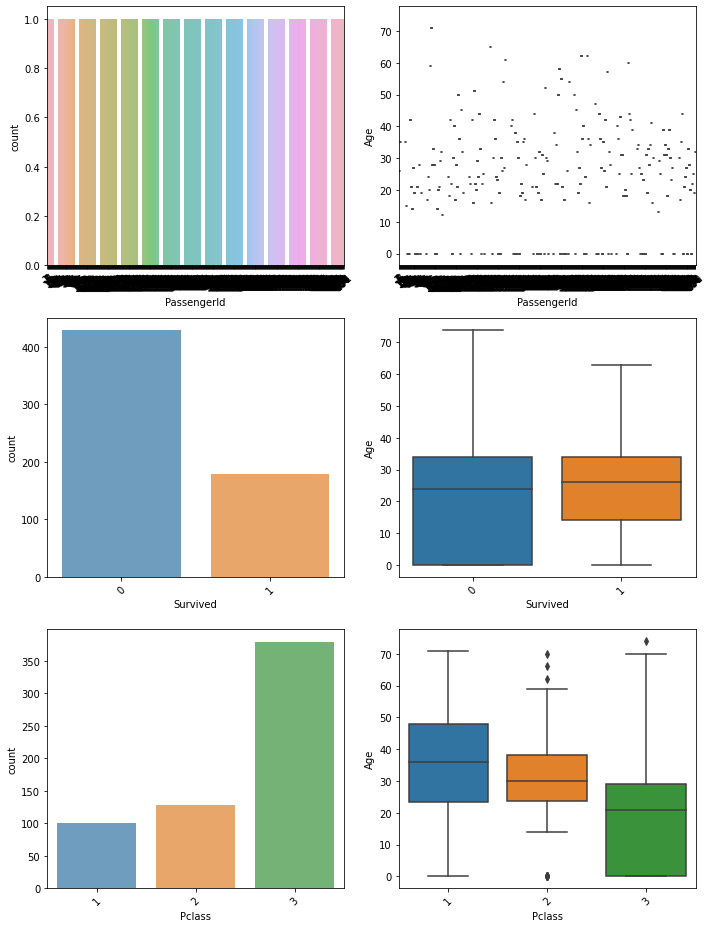

In [30]:
# Feature Scaling
c = 0
len_c = 3 
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))    
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=train2.columns[c], alpha=0.7, data=train2, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = train2, x=train2.columns[c], y='Age', ax=ax)
        c = c + 1
fig.tight_layout()

# **4) SOLUTION**

## **i) 80 - 20 sets**